In [75]:
#imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [76]:
#Carregando a base de dados
x_train = np.load('x_train.npy')
print(x_train.shape)

(1000, 1)


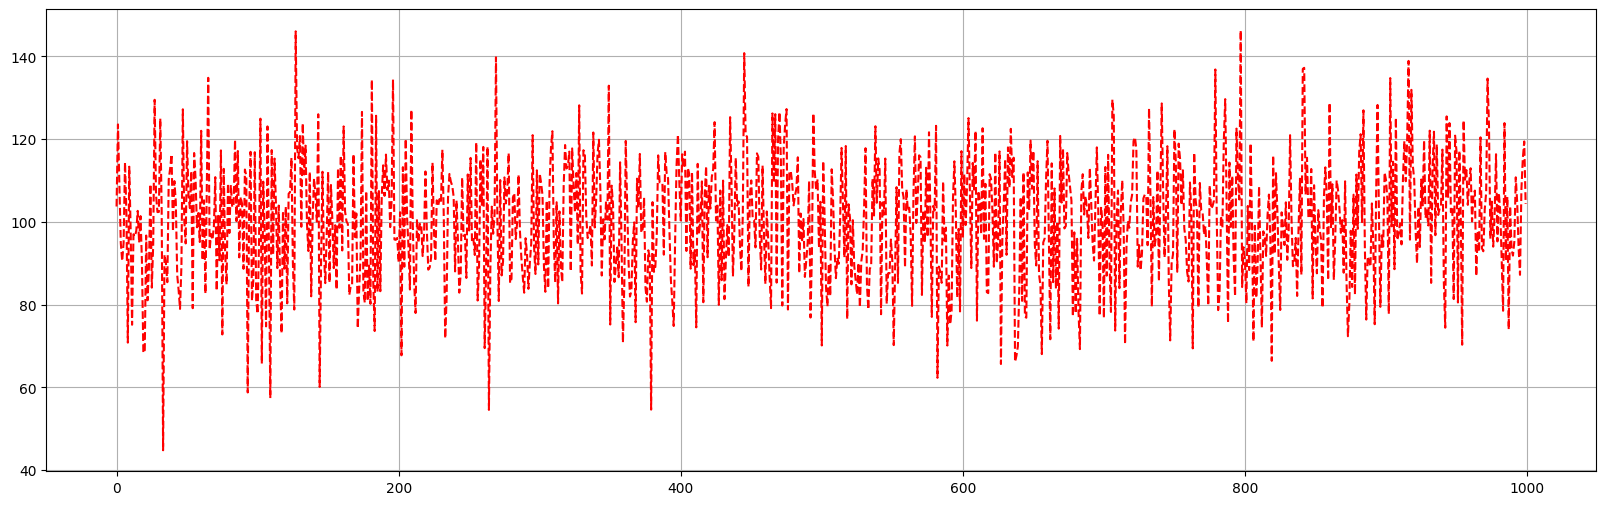

In [77]:
#Valores dos dados
plt.figure(figsize=(20,6))
plt.plot(x_train, color='red', linestyle='dashed')
plt.grid(True)
plt.show()

In [78]:
#Normalizando o dataset
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train = (x_train - x_mean) / x_std

In [79]:
#Defininfo a função densidade de probabilidade
def probability_density_function(x, mu, sigma):
    return 1/(sigma*tf.sqrt(2*np.pi)) * tf.exp(-(x-mu)**2/(2*sigma**2))

In [80]:
#Definição da função log-verossimilhança
def log_likelihood(x, mu, sigma):
    return tf.reduce_sum(tf.math.log(probability_density_function(x, mu, sigma)))

In [81]:
#Definindo as variáveis
mu = tf.Variable(tf.random.normal([1]), name='mu')
sigma = tf.Variable(tf.random.normal([1]), name='sigma')

learning_rate = 0.01
num_iterations = 1000

optimizer = tf.optimizers.Adam(learning_rate)

In [82]:
#Treinamento
for i in range(num_iterations):
    with tf.GradientTape() as tape:
        loss = -log_likelihood(x_train, mu, tf.abs(sigma))

    gradients = tape.gradient(loss, [mu, sigma])
    optimizer.apply_gradients(zip(gradients, [mu, sigma]))

estimated_mean = mu.numpy()[0] * x_std + x_mean
estimated_std = tf.abs(sigma).numpy()[0] * x_std


In [85]:
x = np.linspace(np.min(x_train), np.max(x_train), 1000)
pdf = probability_density_function(x, mu, sigma)

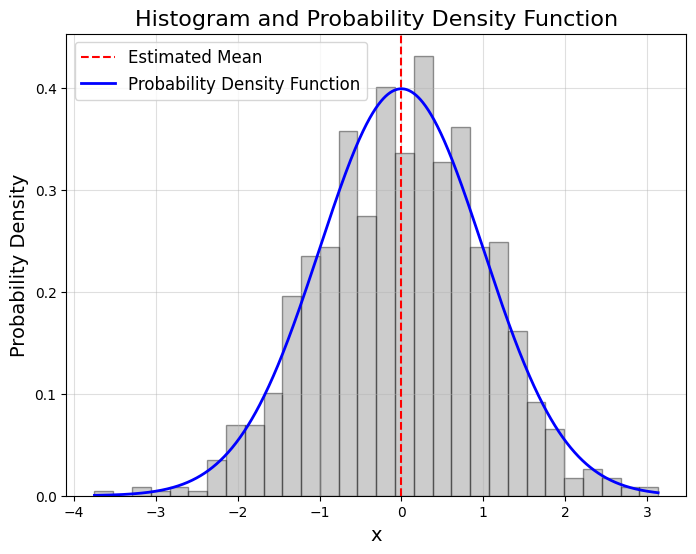

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))

#Histograma
ax.hist(x_train, bins=30, density=True, alpha=0.4, color='gray', edgecolor='black')
ax.axvline(mu.numpy()[0], color='red', linestyle='--', label='Estimated Mean')

#PDF
ax.plot(x, pdf, color='blue', linewidth=2, label='Probability Density Function')

ax.set_title('Histogram and Probability Density Function', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend(fontsize=12)
ax.grid(alpha=0.4)

plt.show()